In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.stats import norm
import math
import statistics
from scipy.optimize import fsolve
##plt.rcParams['text.usetex'] = False
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
from gaussian_functions import *
from DM_halo_functions import *
from GC_functions import *
from Re_functions import *

ModuleNotFoundError: No module named 'gaussian_functions'

## 4 by 4 2d scatter plots

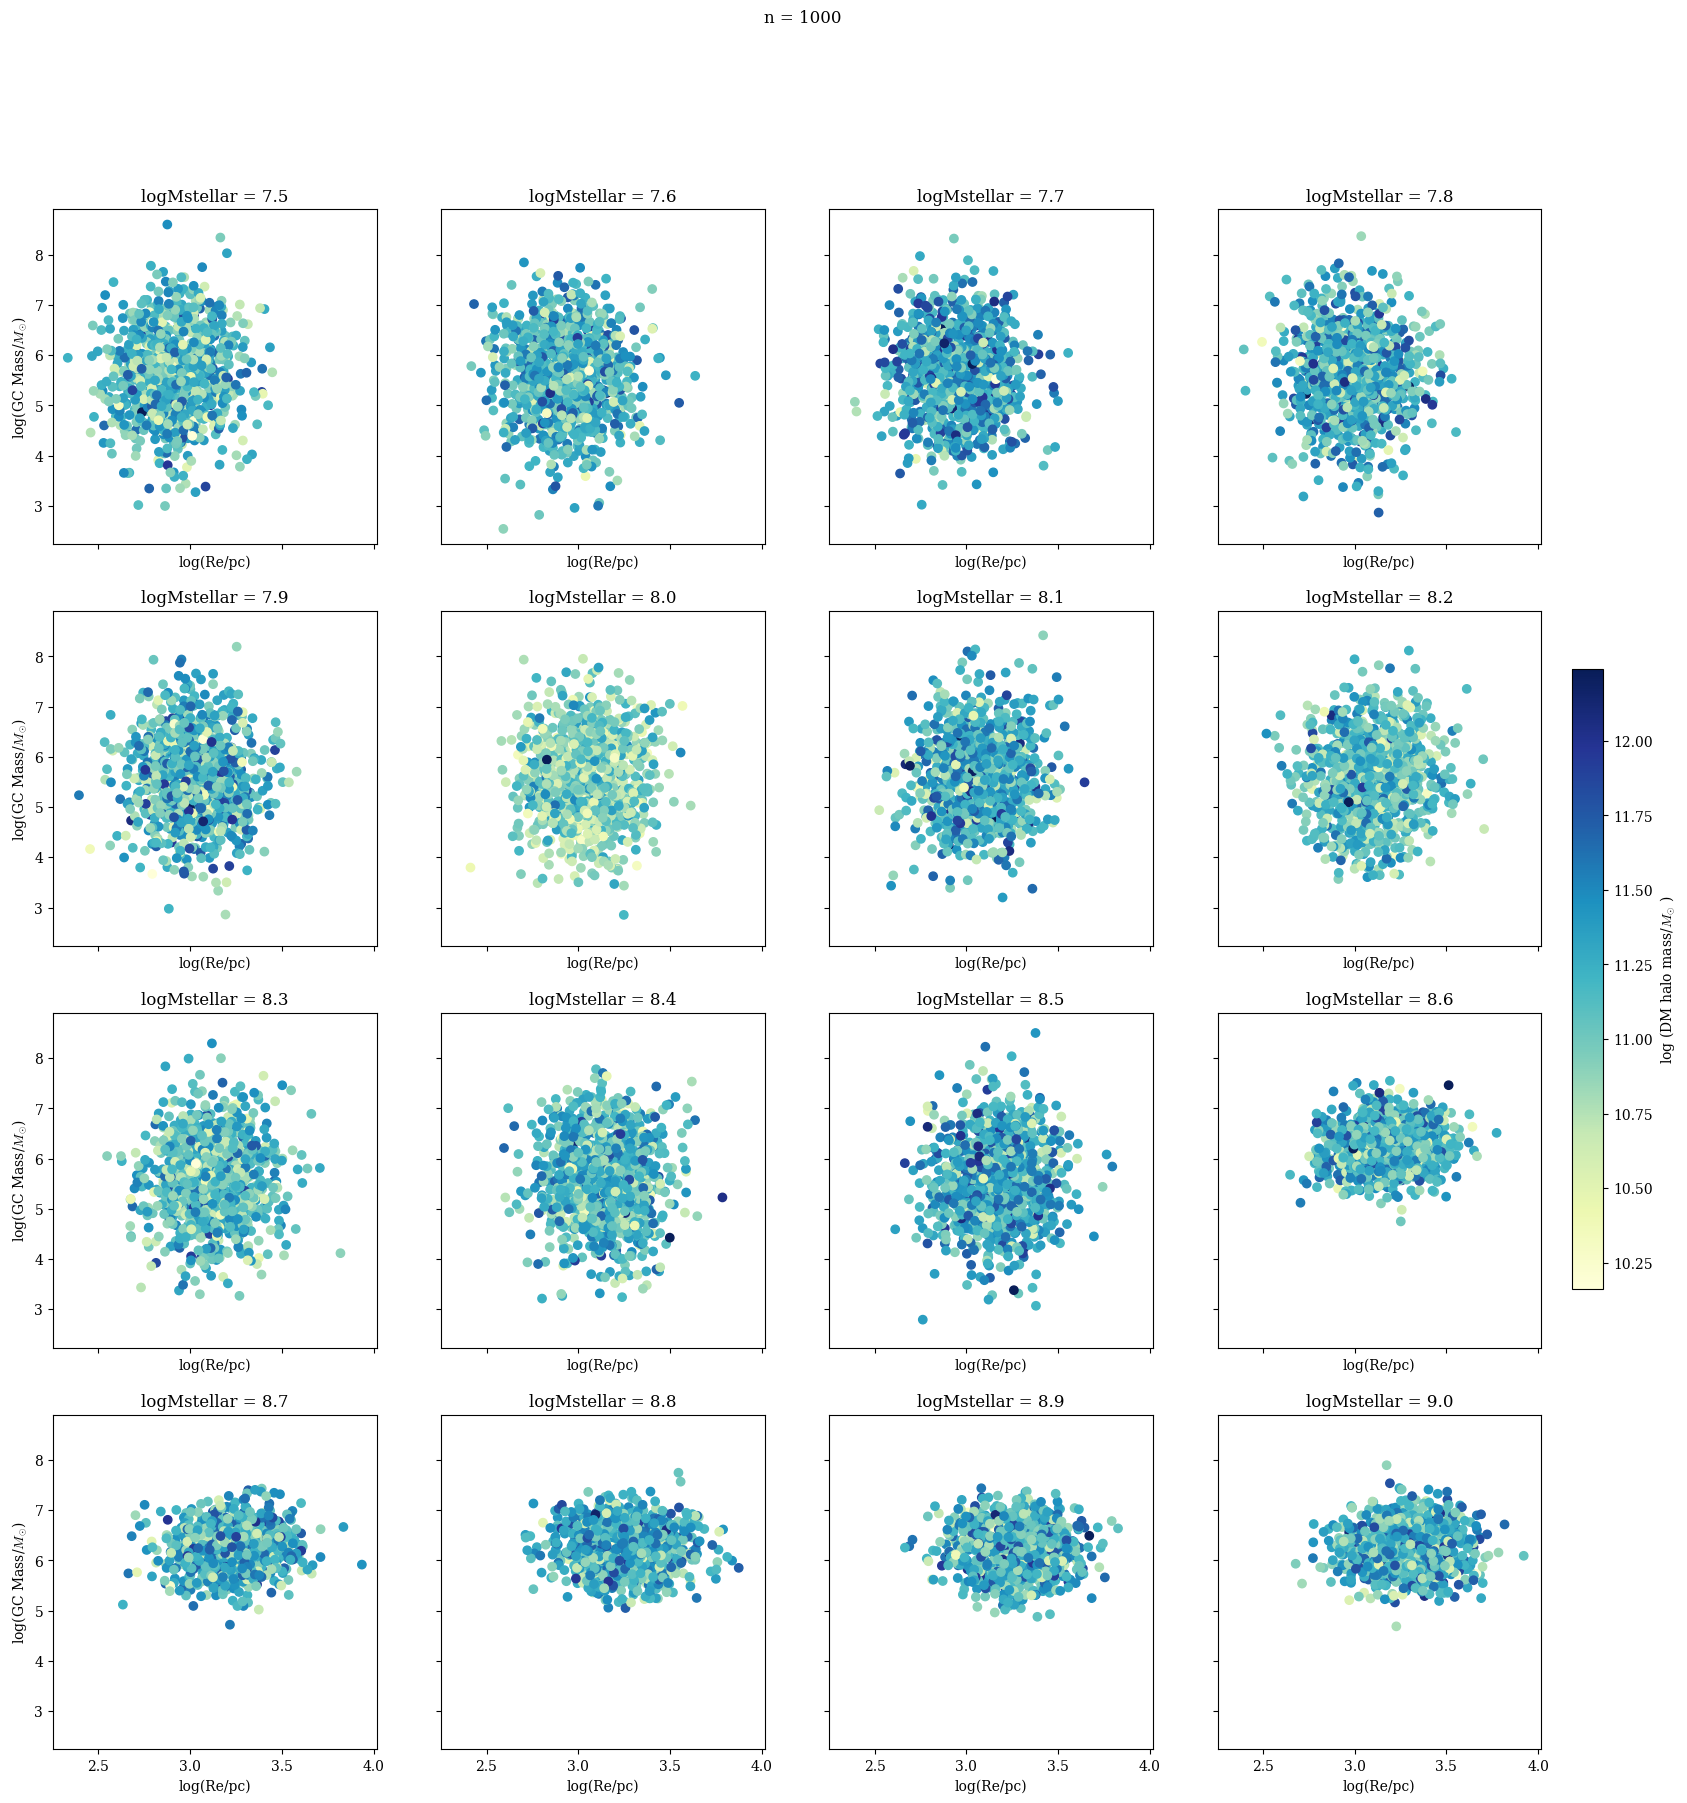

In [3]:
######################################################################
### GRID PLOTS 
######################################################################

# logMstellars = [7.5, 8, 8.5, 9, 9.5]
logMStellars = np.arange(7.5, 9.1, 0.1)
n = 1000
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey = True, sharex = True)

all_logMStellars = []
all_DM_samples = []
all_Re_samples = []
all_GC_samples = []
for logMStellar in logMStellars:
    all_DM_samples.append(np.log10(DM_random_sample(logMStellar, n)))
    all_Re_samples.append(np.log10(Re_random_sample(logMStellar, n)))
    all_GC_samples.append(np.log10(GC_random_sample(logMStellar, n)))
    all_logMStellars.append(np.full(n, logMStellar))

vmin = np.min(all_DM_samples)
vmax = np.max(all_DM_samples)

for i in range (len(axes)):
    axes[i][0].set_ylabel('log(GC Mass/$M_{\odot}$)')
    for j in range (len(axes[0])):
        index = i * 4 + j
        ax = axes[i][j]
        subplot = ax.scatter(all_Re_samples[index], all_GC_samples[index], c=all_DM_samples[index], cmap = 'YlGnBu')
        ax.set_xlabel('log(Re/pc)')
        ax.set_title(f'logMstellar = {logMStellars[index]:.1f}')  # Set individual title




cbar = fig.colorbar(subplot, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('log (DM halo mass/$M_{\odot}$ )')


plt.suptitle ('n = 1000')
plt.show()

## Above points on one plot (multiple solar masses)

<function matplotlib.pyplot.show(close=None, block=None)>

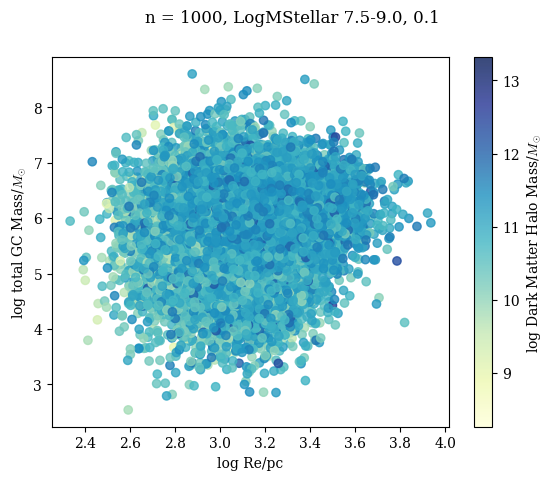

In [4]:
all_Re_samples = np.array(all_Re_samples).flatten()
all_GC_samples = np.array(all_GC_samples).flatten()
all_DM_samples = np.array(all_DM_samples).flatten()
all_logMStellars = np.array(all_logMStellars).flatten()

plt.figure()
plt.scatter(all_Re_samples, all_GC_samples, c =all_DM_samples, cmap = 'YlGnBu', alpha = 0.8)
colorbar = plt.colorbar()
colorbar.set_label('log Dark Matter Halo Mass/$M_{\odot}$')
plt.xlabel('log Re/pc')
plt.ylabel('log total GC Mass/$M_{\odot}$')
plt.suptitle ('n = 1000, LogMStellar 7.5-9.0, 0.1')
plt.show


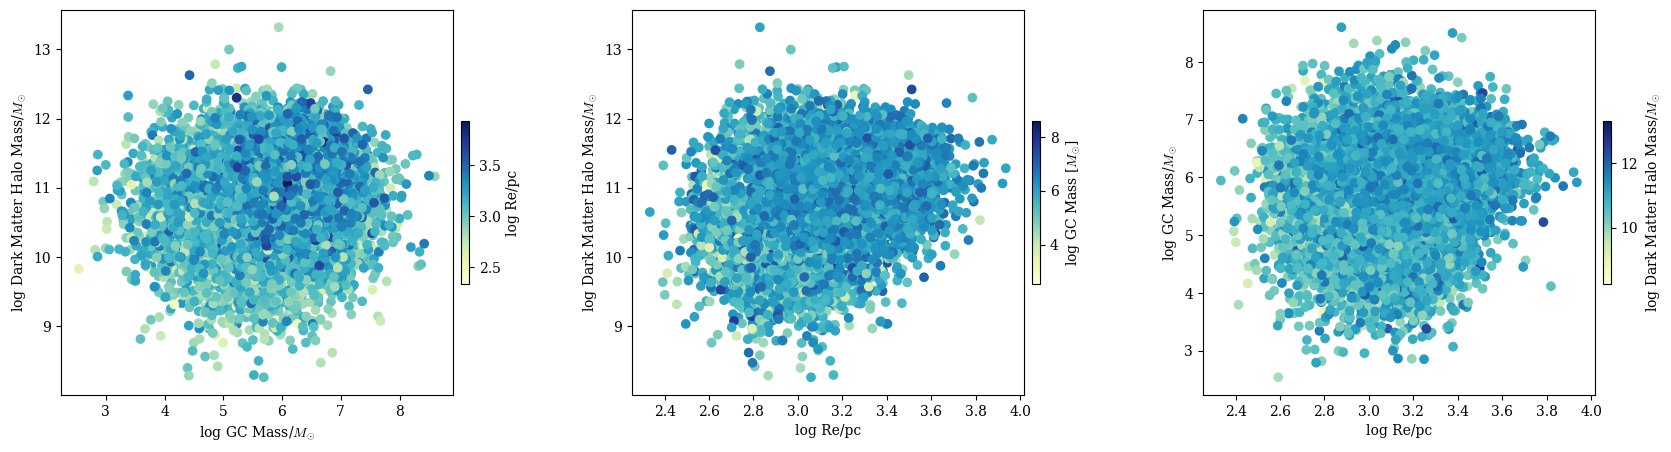

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plt.subplots_adjust(wspace=0.4)

####M DM HALO VS M GC #########

sc0 = axes[0].scatter(all_GC_samples,all_DM_samples,  c = all_Re_samples, cmap = 'YlGnBu')
cbar0 = fig.colorbar(sc0,ax=axes[0], orientation='vertical', fraction=0.02, pad=0.02)
cbar0.set_label('log Re/pc')
axes[0].set_ylabel('log Dark Matter Halo Mass/$M_{\odot}$')
axes[0].set_xlabel('log GC Mass/$M_{\odot}$')


####### M DM HALO VS Re #########
sc1 = axes[1].scatter(all_Re_samples, all_DM_samples, c = all_GC_samples, cmap = 'YlGnBu')
cbar1 = fig.colorbar(sc1, ax=axes[1], orientation='vertical', fraction=0.02, pad=0.02)
cbar1.set_label('log GC Mass [$M_{\odot}$]')
axes[1].set_ylabel('log Dark Matter Halo Mass/$M_{\odot}$')
axes[1].set_xlabel('log Re/pc')

####### Re VS M GC  #########

sc2 = axes[2].scatter(all_Re_samples, all_GC_samples, c = all_DM_samples, cmap = 'YlGnBu')
cbar2 = fig.colorbar(sc2, ax=axes[2], orientation='vertical', fraction=0.02, pad=0.02)
cbar2.set_label('log Dark Matter Halo Mass/$M_{\odot}$')
axes[2].set_xlabel('log Re/pc')
axes[2].set_ylabel('log GC Mass/$M_{\odot}$')
plt.show()

### Same as above but w Mstellar vs param

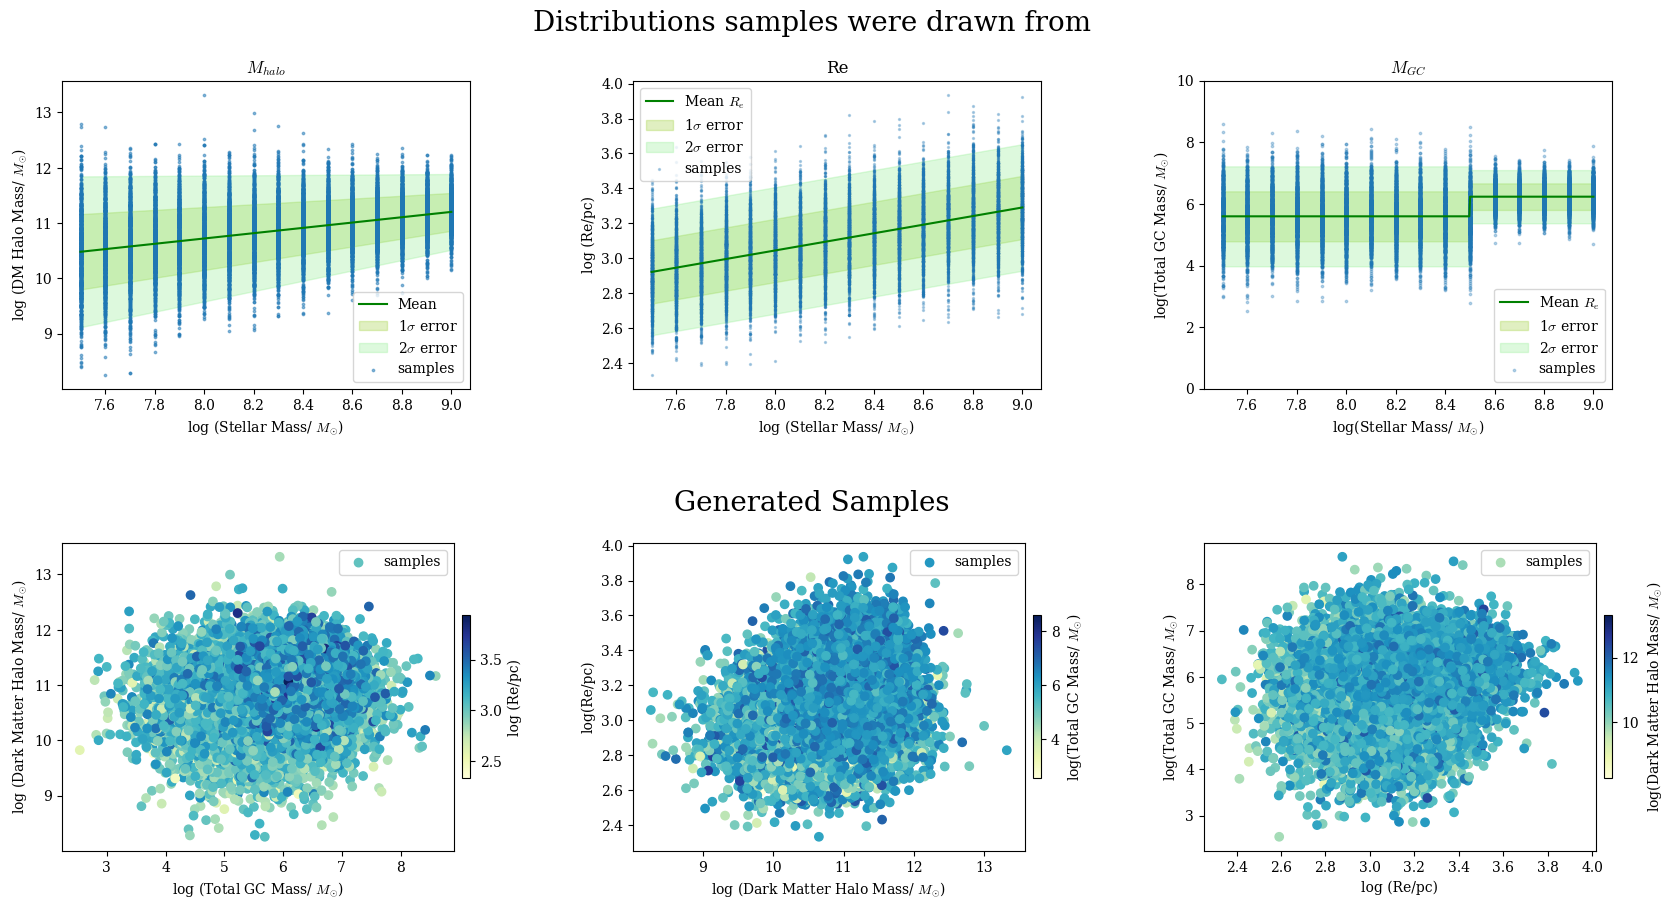

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(wspace=0.4)

##########################################
####M DM HALO VS M GC #########

sc0 = axes[1][0].scatter(all_GC_samples, all_DM_samples,  c = all_Re_samples, cmap = 'YlGnBu', label = 'samples')
cbar0 = fig.colorbar(sc0,ax=axes[1][0], orientation='vertical', fraction=0.02, pad=0.02)
cbar0.set_label('log (Re/pc)')
axes[1][0].set_ylabel('log (Dark Matter Halo Mass/ $M_{\odot}$)')
axes[1][0].set_xlabel('log (Total GC Mass/ $M_{\odot}$)')

logMS = np.linspace(7.5, 9, 500)
mean_Mhalos = [] 
logsigmas = []
doublelogsigmas = []
for i in range (len(logMS)):
    logMhalo = logMhalo_eq(logMS[i])
    mean_Mhalos.extend (logMhalo) ## gives value of mean halos (not log)
    logsigmas.extend(abs(std_eq(logMhalo)))

mean_Mhalos = np.array(mean_Mhalos)
logsigmas = np.array(logsigmas)
axes[0][0].plot(logMS, mean_Mhalos, color = 'green', label = 'Mean')
axes[0][0].fill_between(logMS, mean_Mhalos - logsigmas, mean_Mhalos + logsigmas, color='yellowgreen', alpha=0.3, label='1$\sigma$ error')
axes[0][0].fill_between(logMS, mean_Mhalos - 2 * logsigmas, mean_Mhalos + 2 * logsigmas, color='lightgreen', alpha=0.3, label='2$\sigma$ error')

axes[0][0].scatter (all_logMStellars, all_DM_samples, alpha = 0.5, s=3, label = 'samples')
axes[0][0].set_xlabel('log (Stellar Mass/ $M_{\odot}$)')
axes[0][0].set_ylabel('log (DM Halo Mass/ $M_{\odot}$)')



##########################################
####### M DM HALO VS Re #########
sc1 = axes[1][1].scatter(all_DM_samples, all_Re_samples, c = all_GC_samples, cmap = 'YlGnBu', label = 'samples')
cbar1 = fig.colorbar(sc1, ax=axes[1][1], orientation='vertical', fraction=0.02, pad=0.02)
cbar1.set_label('log(Total GC Mass/ $M_{\odot}$)')
axes[1][1].set_xlabel('log (Dark Matter Halo Mass/ $M_{\odot}$)')
axes[1][1].set_ylabel('log(Re/pc)')

## Plot of Re for range of Stellar values 
logMS = np.linspace(7.5, 9, 1000)
Re = logRe_eq(logMS)
sigmaRe = 0.181
axes[0][1].plot(logMS, Re, color='green', label='Mean $R_e$')
axes[0][1].fill_between(logMS, Re - sigmaRe, Re + sigmaRe, color='yellowgreen', alpha=0.3, label='1$\sigma$ error')
axes[0][1].fill_between(logMS, Re - 2 * sigmaRe, Re + 2 * sigmaRe, color='lightgreen', alpha=0.3, label='2$\sigma$ error')

axes[0][1].scatter (all_logMStellars, all_Re_samples, alpha = 0.3, s=2, label = 'samples')
axes[0][1].set_xlabel('log (Stellar Mass/ $M_{\odot}$)')
axes[0][1].set_ylabel('log (Re/pc)')



##########################################
####### Re VS M GC  #########

sc2 = axes[1][2].scatter(all_Re_samples, all_GC_samples, c = all_DM_samples, cmap = 'YlGnBu', label = 'samples')
cbar2 = fig.colorbar(sc2, ax=axes[1][2], orientation='vertical', fraction=0.02, pad=0.02)
cbar2.set_label('log(Dark Matter Halo Mass/ $M_{\odot}$)')
axes[1][2].set_xlabel('log (Re/pc)')
axes[1][2].set_ylabel('log(Total GC Mass/ $M_{\odot}$)')



GC_mean = []
GC_sigma = []
logMS = np.linspace(7.5, 9, 500)
for i in range(len(logMS)):
    logM_GCstripe, logM_Sstripe, histbins = GC_stripe_func (logMS[i])
    mu, sigma = Gaussian_params(logM_GCstripe, bins=10)
    GC_mean.append(mu)
    GC_sigma.append(sigma)

    GC_mean = np.array(GC_mean)
GC_sigma = np.array(GC_sigma)
axes[0][2].plot(logMS, GC_mean, color='green', label='Mean $R_e$')
axes[0][2].fill_between(logMS, GC_mean - GC_sigma, GC_mean + GC_sigma, color='yellowgreen', alpha=0.3, label='1$\sigma$ error')
axes[0][2].fill_between(logMS, GC_mean - 2 * GC_sigma, GC_mean + 2 * GC_sigma, color='lightgreen', alpha=0.3, label='2$\sigma$ error')


axes[0][2].scatter (all_logMStellars, all_GC_samples, alpha = 0.3, s= 3, label = 'samples')

axes[0][2].set_ylim (0, 10)
axes[0][2].set_xlabel ('log(Stellar Mass/ $M_{\odot}$)')
axes[0][2].set_ylabel ('log(Total GC Mass/ $M_{\odot}$)')

### This is just two of the stipe bins should I make them narrower?
for i in range (2):
    for j in range (3):
        axes[i][j].legend()

plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.93, 'Distributions samples were drawn from', ha='center', fontsize=20)
fig.text(0.5, 0.45, 'Generated Samples', ha='center', fontsize=20)

axes[0][0].set_title('$M_{halo}$')
axes[0][1].set_title('Re')
axes[0][2].set_title('$M_{GC}$')


# plt.savefig('samples_with_dist')
plt.show()

## Debugging

In [29]:
Mstellar = np.logspace(5, 11, 500, base=10)
logMstellar = np.log10(Mstellar)
mean_Mhalos = [] ## M halos for these stellar values
logsigmas = []  ## standard deviations for these M halo values

for i in range (len(logMstellar)):
    logMhalo = DM_random_sample(logMstellar[i], 1)
    mean_Mhalos.extend (logMhalo) ## gives value of mean halos (not log)
    logsigmas.extend(abs(std_eq(logMhalo)))
    
plt.figure(figsize=(5,5))
plt.plot(mean_Mhalos, logMstellar)
plt.errorbar(mean_Mhalos, logMstellar, xerr = logsigmas, color = 'blue', linewidth = 2, ecolor='lavender', alpha = 0.5)
plt.xlabel('log M dark matter halo', size = 15)
plt.ylabel('log M stellar', size = 15)
plt.xticks(np.linspace(8, 13, 6))
plt.show()

TypeError: 'tuple' object is not callable

## Contour plots for multiple solar masses

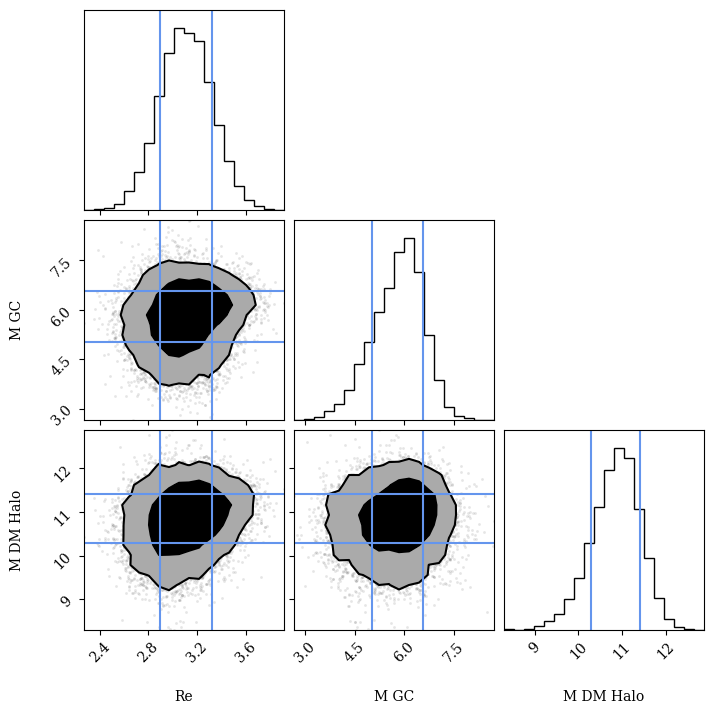

In [6]:
import numpy as np
import corner

# Example data: 1000 samples of 3 variables

data = np.vstack([all_Re_samples, all_GC_samples, all_DM_samples]).T  # Replace with your actual data

# Create the corner plot
contour_colors = ['blue', 'red']
figure = corner.corner(
    data,
    labels=["Re", "M GC", "M DM Halo"],
    levels=[0.6827, 0.9545],  # 1 sigma and 2 sigma contours
    fill_contours=True,  # Fill the contours with color
    plot_contours=True,  # Plot contour lines
)

stds = np.std(data, axis=0)
means = np.mean(data, axis=0)

corner.overplot_lines(figure, means+stds, color="cornflowerblue")
corner.overplot_lines(figure, means-stds, color="cornflowerblue")

# Show the plot
figure.show()
